<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침_길이  150 non-null    float64
 1   꽃받침_너비  150 non-null    float64
 2   꽃잎_길이   150 non-null    float64
 3   꽃잎_너비   150 non-null    float64
 4   품종_번호   150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<Figure size 1600x600 with 0 Axes>

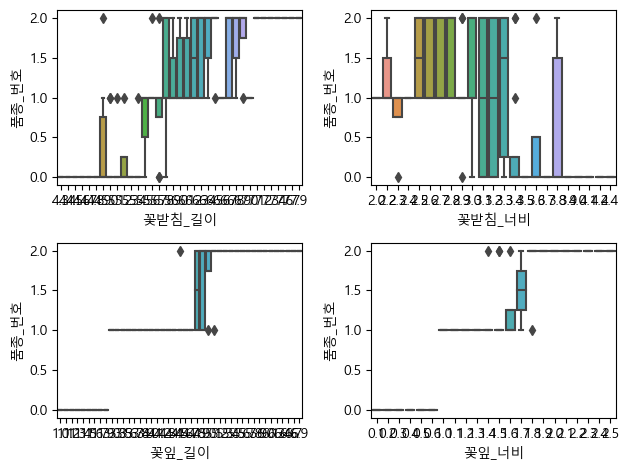

In [39]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')
%matplotlib inline

## 1. 데이터 불러오기 및 확인하기
iris = load_iris()

# iris 데이터의 전반적인 정보 확인
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['꽃받침_길이', '꽃받침_너비', '꽃잎_길이', '꽃잎_너비'] # column 이름 재정의
df['품종_번호'] = iris.target # 품종 번호 col 추가
df.info()

## 2. 전처리
# 결측치 확인 및 처리
df.isnull().sum() # 결측치 존재 X

# 중복값 확인 및 처리
df.duplicated().sum() # 1개의 중복값 존재
df.loc[df.duplicated(), :] # 142번 데이터가 중복임을 확인.
df.loc[(df['꽃받침_길이'] == 5.8) & (df['꽃받침_너비'] == 2.7) & (df['꽃잎_길이'] == 5.1) & (df['꽃잎_너비'] == 1.9)] # 142번과 동일한 데이터 가진 데이터 찾기(101)
# 1개의 중복값이 존재하나 영향을 끼치지 않을 것 이기에 제거는 하지 않음.

# 이상치 확인 및 처리
plt.figure(figsize=(16, 6))
fig, axes = plt.subplots(2, 2)
sn.boxplot(x="꽃받침_길이", y="품종_번호", data=df, ax=axes[0, 0])
sn.boxplot(x="꽃받침_너비", y="품종_번호", data=df, ax=axes[0, 1])
sn.boxplot(x="꽃잎_길이", y="품종_번호", data=df, ax=axes[1, 0])
sn.boxplot(x="꽃잎_너비", y="품종_번호", data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()


#df['품종 번호'].value_counts() # 각 50개씩 존재


# 상관 관계 분석
#df.corr()

# EDA(Exploratory Data Analysis)
# 통계 정보 확인
#df.describe()

# 3. 머신러닝




# 4. 결과